In [5]:
import pandas as pd
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import shutil as sh
import time as tm
import os
from tqdm import tqdm
print('pandas version:',pd.__version__)
print('numpy version:',np.__version__)
print('scipy version:',sc.__version__)
print('matplotlib version: N/A')
print('shutil version: N/A')
print('time version: N/A')
print('os version: N/A')
print('tqdm version: N/A')

pandas version: 2.2.2
numpy version: 1.26.4
scipy version: 1.13.1
matplotlib version: N/A
shutil version: N/A
time version: N/A
os version: N/A
tqdm version: N/A


In [41]:
def heartbeat_signal_data(logpath):
    for _  in range(93):           # 1 measurement every minute
         timestamp = tm.strftime('%Y-%m-%d %H:%M:%S %z')
         ldf = pd.DataFrame(np.random.uniform(50,100, size=(1, 7)), columns=('CPU temp','Mem temp','Battery temp','Solar temp', 'Board temp', 'Antenna temp', 'Storage temp'))
         ldf.insert(0, 'Timestamp', [tm.strftime('%Y-%m-%d %H:%M:%S %z')])
         ldf = ldf.set_index(['Timestamp'])
         #adds the voltages
         ldf[['CPU volt', 'Solar volt', 'Batt volt']] = pd.DataFrame([[np.random.uniform(1,6), np.random.randint(0,10), np.random.randint(0,10)]], index=ldf.index)

        #Appends to CSV: if the file doesn't exist, writes the header; otherwise it skips the header
         if not os.path.isfile(logpath):
             ldf.to_csv(logpath, mode='a', index=True, header=True)
         else:
             ldf.to_csv(logpath, mode='a', index=True, header=False)

In [43]:
def magnetomoter_data(datapath):
    for _  in range(337):          # 1 meassurement per second of contact time
        timestamp = tm.strftime('%Y-%m-%d %H:%M:%S %z')
        df1 = pd.DataFrame(np.random.uniform(-70,130, size=(1, 3)), columns=('north (h)','east (d)','vertical (z)'))
        df1.insert(0, 'Timestamp', [tm.strftime('%Y-%m-%d %H:%M:%S %z')])
        df1 = df1.set_index(['Timestamp'])

        #same as previous cell
        if not os.path.isfile(datapath):
            df1.to_csv(datapath, mode='a', index=True, header=True)
        else:
            df1.to_csv(datapath, mode='a', index=True, header=False)

In [45]:
def read_log(logpath):
    #Reads the contents of 'log.csv' but doesn't print them, not making that mistake again
    try:
        with open(logpath, 'r') as f:
            contents = f.read()
    except FileNotFoundError:
        print('log.csv not found')
        return

In [47]:
def read_data(datapath):
    #Read the contents of 'data.csv'
    try:
        with open(datapath, 'r') as f:
            contents = f.read()
    except FileNotFoundError:
        print('data.csv not found')
        return

In [67]:
def log_del(logpath):  #delets target file
    try:
        os.remove(logpath)
    except OSError as elog:
        print(f'Error deleting log.csv: {elog}')

In [69]:
def data_del(datapath): #deletes target file
    try:
        os.remove(datapath)
    except OSError as edata:
        print(f'Error deleting data.csv: {edata}')

In [53]:
def comms_cycle(x, logpath, datapath):
    for _ in range (x):
        for _ in range (3): #3 orbits per downlink, so 3 writes to 1 read and deletion
            heartbeat_signal_data(logpath)
            magnetomoter_data(datapath)
        read_log(logpath)
        read_data(datapath)
        log_del(logpath)
        data_del(datapath)

In [119]:
def log_health_bytes(target):
    total, used, free = sh.disk_usage(target)
    timestamp = tm.strftime('%Y-%m-%d %H:%M:%S %z')
    hdf = pd.DataFrame(([[total, used, free]]), columns=('Total','Used','Free'))
    hdf.insert(0, 'Timestamp', [tm.strftime('%Y-%m-%d %H:%M:%S %z')])
    hdf = hdf.set_index(['Timestamp'])

    csv_path = 'health.csv'

#Append to CSV: if the file doesn't exist yet, write header; otherwise skip header
    if not os.path.isfile(csv_path):
        hdf.to_csv(csv_path, mode='a', index=True, header=True)
    else:
        hdf.to_csv(csv_path, mode='a', index=True, header=False)

In [73]:
def test(healthchecknum, cyclesperhealthcheck):
    log_health_bytes('E:/')
    
    for i in tqdm(range(healthchecknum), desc='Processing'):    #nifty progress bar
        comms_cycle(cyclesperhealthcheck, 'E:/log.csv', 'E:/data.csv')
        log_health_bytes('E:/')

In [121]:
if __name__ == '__main__':
    test(4,5)

Processing: 100%|████████████████████████████████████████████████████████████████████████| 4/4 [01:45<00:00, 26.32s/it]


In [73]:
health_data

,total,used,free
Timestamp,,,
2025-06-06 14:39:04+01:00,15493758976,131072,15493627904
2025-06-06 14:39:46+01:00,15493758976,131072,15493627904
2025-06-06 14:40:27+01:00,15493758976,131072,15493627904
2025-06-06 14:41:08+01:00,15493758976,131072,15493627904
2025-06-06 14:41:50+01:00,15493758976,131072,15493627904
...,...,...,...
2025-06-07 18:32:42+01:00,15493758976,524288,15493234688
2025-06-07 18:34:30+01:00,15493758976,524288,15493234688
2025-06-07 18:36:17+01:00,15493758976,524288,15493234688


In [69]:
health_data = pd.read_csv('./health.csv',delimiter=',',index_col=0)

In [71]:
health_data.index=pd.to_datetime(health_data.index)

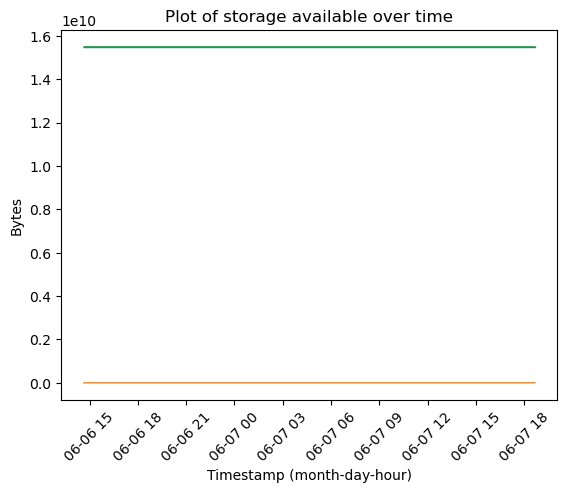

In [75]:
plt.plot(health_data.index, health_data,linewidth=1)
plt.title('Plot of storage available over time')
plt.xlabel('Timestamp (month-day-hour)')
plt.ylabel('Bytes')
plt.xticks(rotation=45)
plt.savefig('Plot of storage available over time')
plt.show()

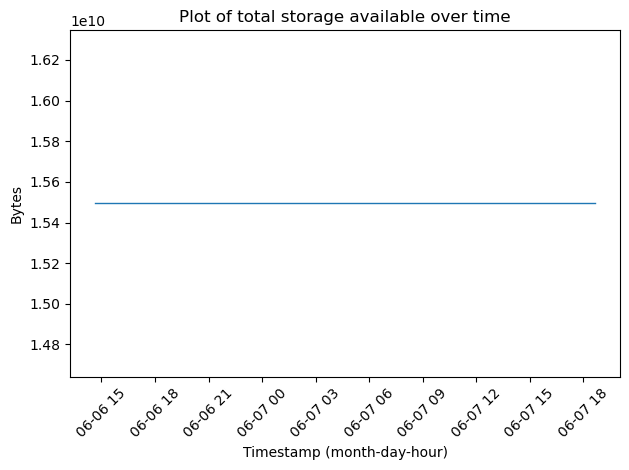

In [85]:
plt.plot(health_data.index, health_data['total'],linewidth=1)
plt.title('Plot of total storage available over time')
plt.xlabel('Timestamp (month-day-hour)')
plt.ylabel('Bytes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Plot of total storage available over time')
plt.show()

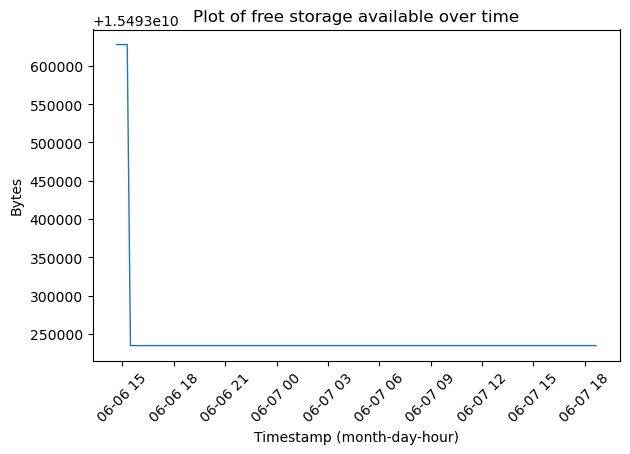

In [87]:
plt.plot(health_data.index, health_data['free'],linewidth=1)
plt.title('Plot of free storage available over time')
plt.xlabel('Timestamp (month-day-hour)')
plt.ylabel('Bytes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Plot of free storage available over time')
plt.show()

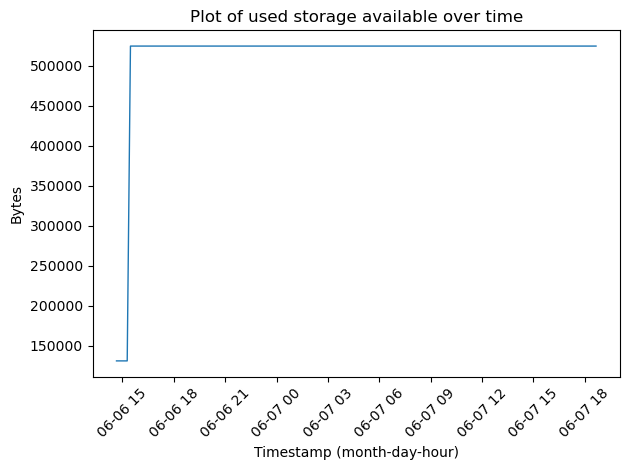

In [89]:
plt.plot(health_data.index, health_data['used'],linewidth=1)
plt.title('Plot of used storage available over time')
plt.xlabel('Timestamp (month-day-hour)')
plt.ylabel('Bytes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Plot of used storage available over time')
plt.show()

In [34]:
def comms_cycle_test(x, logpath, datapath):
    for _ in range (x):
        for _ in range (5):
            heartbeat_signal_data(logpath)
            magnetomoter_data(datapath)

In [36]:
comms_cycle_test(1, 'E:/log.txt', 'E:/data.txt')